# Clustering analysis
For this project, I didn't yet manage to find an interesting dataset to analyse.
Therefore, I will generate some random data and write an analysis pipeline.
I will replace the synthetic data with real ones asap, and extract meaningful insigths. 

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns; sns.set(); sns.set_context("talk")  # for plot styling
import numpy as np

from sklearn.datasets.samples_generator import make_blobs


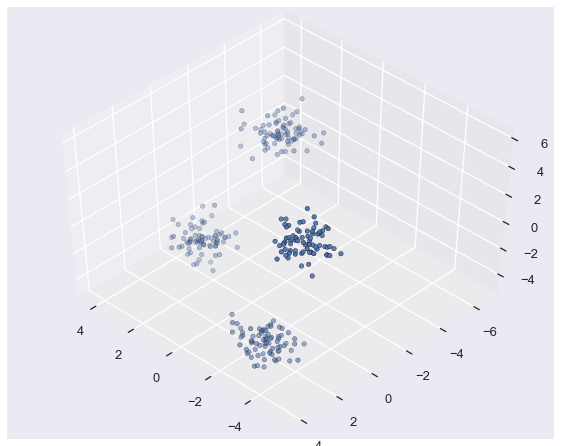

In [50]:
X, y_true = make_blobs(n_samples=300, centers=4, n_features = 3, center_box = (-5,5), cluster_std=0.60, random_state = 10)

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor='k')
plt.show()

with 1 clusters the within-cluster sum of squares is 900.00
with 2 clusters the within-cluster sum of squares is 414.52
with 3 clusters the within-cluster sum of squares is 177.98
with 4 clusters the within-cluster sum of squares is 29.67
with 5 clusters the within-cluster sum of squares is 27.40
with 6 clusters the within-cluster sum of squares is 25.40
with 7 clusters the within-cluster sum of squares is 23.45
with 8 clusters the within-cluster sum of squares is 21.57
with 9 clusters the within-cluster sum of squares is 20.26


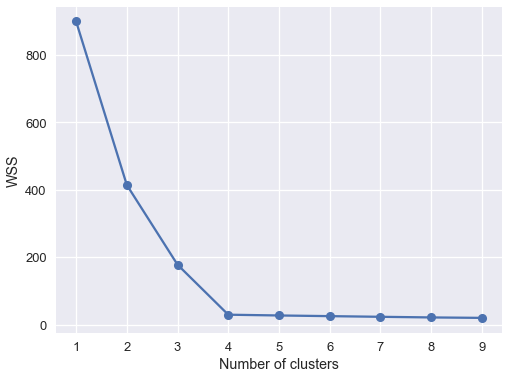

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# when clustering, it is essential to normlize the data, since different factors, likely with differnet units and value ranges, will be added together.
# we don't want that results are different depending on arbitrary choices like whether distances are measured in meters or centimeters
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# in clustering problems, the number of clusters that generated the data is usually unknown. to estimate it, we can proceed as follow:
n_clusters = range(1,10)
clusters_wss = [] # we will keep track of the within-cluster sum of squares for each choice on the number of clusters

for n in n_clusters:
    clusters = KMeans(n)
    clusters.fit(X_scaled)
    clusters_wss.append(clusters.inertia_)
    print('with %.0f clusters the within-cluster sum of squares is %.2f' % (n, clusters.inertia_ ))

fig = plt.figure(figsize=(8, 6))
plt.plot(n_clusters, clusters_wss, marker = 'o')
plt.xlabel('Number of clusters'); plt.ylabel('WSS');  
plt.show()

It seems that, before reaching a model with 4 clusters, adding clusters strongly reduces the distances between data points and their associated cluster. Including more than 4 clusters does not seem to make a difference anymore. Of course, this was to be expected: the data were generated using 4 different clusters! However, as mentioned before, when analysing real data the number of clusters is usually unknown.

This analysis is commonly called "elbow analysis", as the trend in the plot resembles the shape of a bent arm and the position of the elbow correspond to the number of clusters that best describe the observed data.

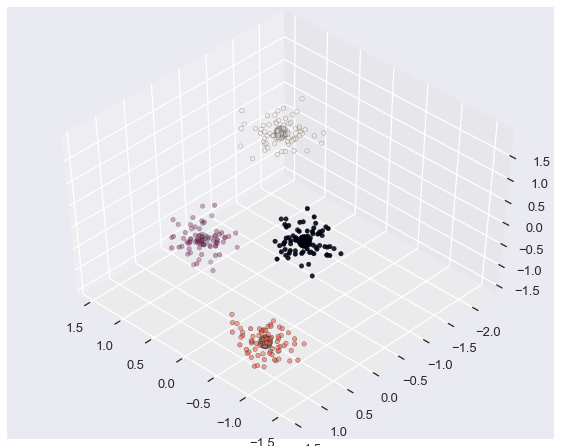

In [62]:
kmeans = KMeans(n_clusters  = 4)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c = labels, edgecolor='k')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],  c = 'black', s = 200, edgecolor='k')

fig.savefig('result.png')
plt.show()